In [151]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model

In [152]:
data = pd.read_csv("Train.csv")
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Supermarket Type1,994.7052


In [153]:
data.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [154]:
data['Item_Weight'].fillna(int(data['Item_Weight'].mean()),inplace=True)
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Small,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Supermarket Type2,1845.5976


In [155]:
data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [156]:
data.shape

(8523, 9)

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 599.4+ KB


In [158]:
#Statistical Measures About The Data
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.710428,0.066132,140.992782,1997.831867,2181.288914
std,4.238481,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Figure size 600x600 with 0 Axes>

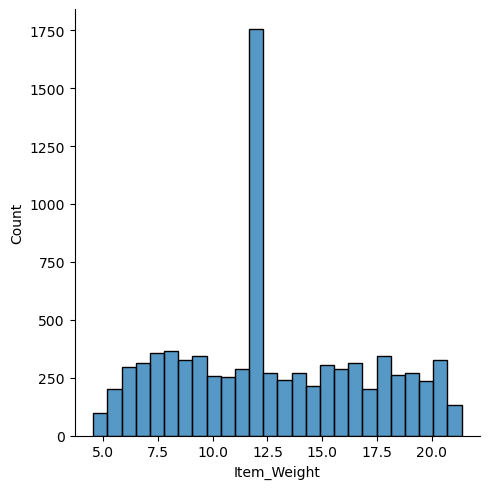

In [159]:
#Item Weight Distribution
plt.figure(figsize=(6,6))
sns.displot(data['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

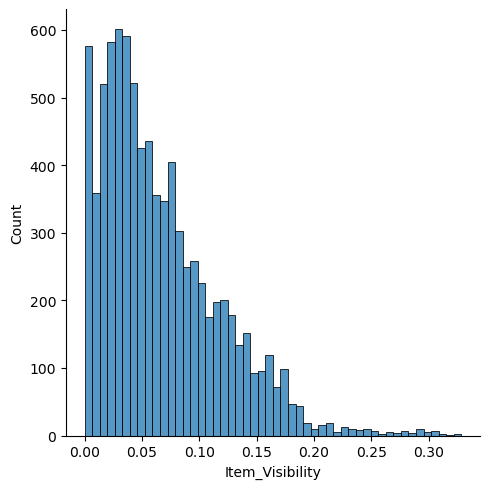

In [160]:
#Item Visibility Distribution
plt.figure(figsize=(6,6))
sns.displot(data['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

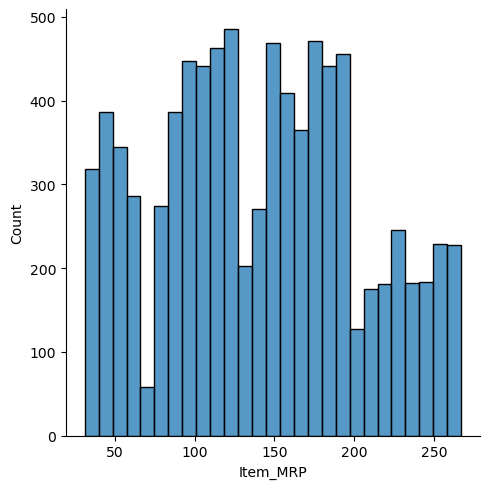

In [161]:
#Item MRP Distribution
plt.figure(figsize=(6,6))
sns.displot(data['Item_MRP'])
plt.show()

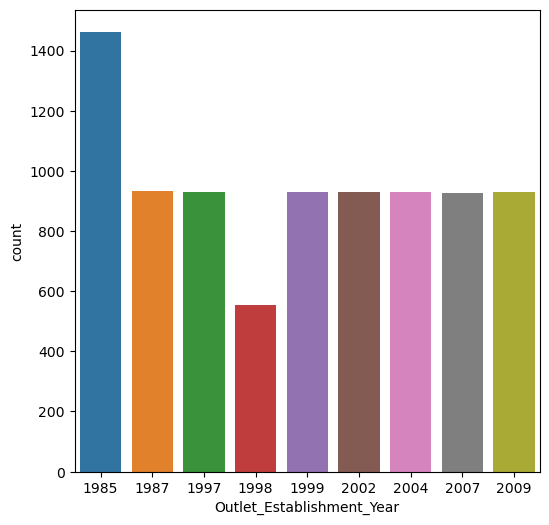

In [162]:
#Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=data)
plt.show()

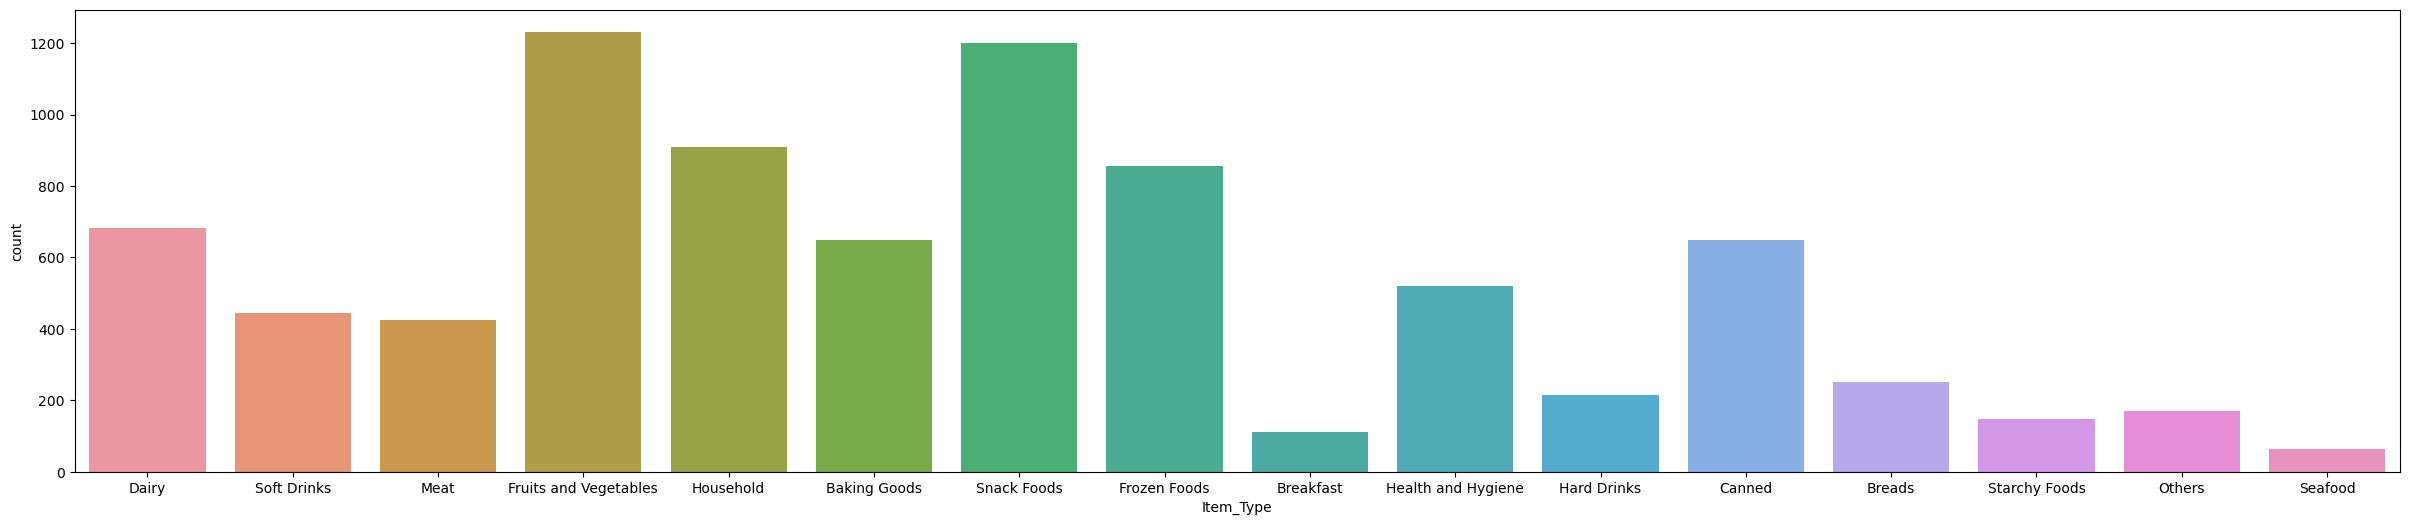

In [163]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=data)
plt.show()

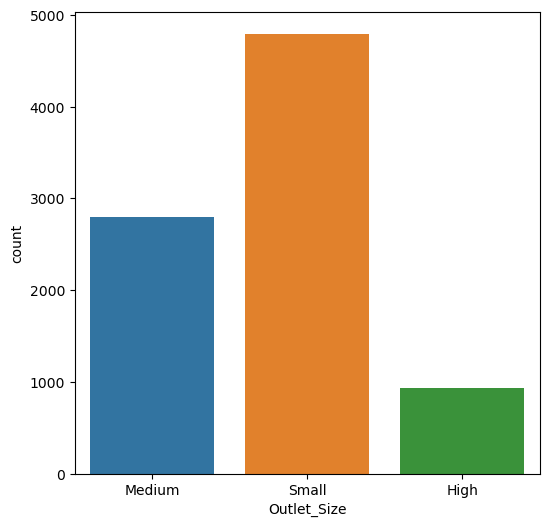

In [164]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=data)
plt.show()

In [165]:
data=pd.get_dummies(data=data,drop_first=True)
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [166]:
x=data.drop('Item_Outlet_Sales',axis=1)
y=data['Item_Outlet_Sales']

In [167]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [168]:
lm=linear_model.LinearRegression()
model=lm.fit(x_train,y_train)

In [169]:
model.coef_

array([ 1.64285757e+00, -2.91426316e+02,  1.56227398e+01,  5.67148886e+00,
        1.38726320e+01,  5.27874582e+01,  3.32121216e+01, -1.91883179e+01,
        5.10126828e+00, -2.09023066e+01,  3.49749486e+01, -9.88315473e+01,
       -3.53460418e+01,  3.74500899e+01, -2.99949454e+01,  1.28545817e+01,
       -6.10318728e+01, -3.16912728e+01, -3.49853146e+01,  2.83378901e+02,
        1.55285275e+01, -7.33369384e+01,  4.02371244e+01, -2.98342108e+01,
       -7.72219661e+01,  1.88818827e+03,  1.49785885e+03,  3.37927899e+03])

In [170]:
model.intercept_

-13089.88696977033

In [171]:
y_pred = model.predict(x_test)

In [150]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

1308268.3398748543


In [172]:
test_data = [[5.92,0.016047,48.2692,2009,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0]]

In [173]:
prediction = model.predict(test_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [174]:
print(prediction)

[2696.19544406]
